In [1]:
import numpy as np
from nibabel.testing import data_path
import nibabel as nib

import keras
from keras import backend as K
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display

import nilearn
from nilearn import plotting
from nilearn import image
from nilearn import datasets

from keras_tqdm import TQDMNotebookCallback

# Get dataset with nilearn function
# if not downloaded, will download. If already downloaded, will use local version
dataset = nilearn.datasets.fetch_cobre(n_subjects=146, data_dir="C:\\Users\\Imagi\\Documents\\5850\\datasets", url=None, verbose=1)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\npyio.py:2315: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [7]:
phenotypes = dataset["phenotypic"]
confounds = dataset["confounds"]
file_paths = dataset["func"]
phenotypes.sort(0) #sort by column corresponding to patient number
file_paths.sort() #sort file names by alphabetical order, which will result in sorting by patient number
confounds.sort()

#file_paths is now a regular python list of the file paths to the fmri scans
#phenotypes is now a np.recarray of np.records storing patient info
# get just the diagnosis information from the phenotypes
diagnosis = phenotypes['diagnosis']
diagnosis_converted = []
#this stem is necessary to convert np.byte array into strings, 
#and then fit those strings into 2 categories:
#Schizophrenia or no Schizophrenia
for item in diagnosis:
    s = item.decode('UTF-8')
    if s != "None":
        diagnosis_converted.append(float(1))   #person has schizophrenia
    else:
        diagnosis_converted.append(float(0))   #person doesn't have schizophrenia

del diagnosis_converted[74] # item 74 is a messed up scan with different dimensions
del file_paths[74]          # so it needs to be removed
del confounds[74]

Y = np.array(diagnosis_converted)
display(Y.shape)

(145,)

In [8]:

# this is a brain anatomical atlas template, that gives us brain reigons with their labels
msdl_atlas_dataset = nilearn.datasets.fetch_atlas_msdl(data_dir="C:\\Users\\Imagi\\Documents\\5850")

from nilearn import image
from nilearn import input_data
from sklearn.externals.joblib import Memory   # A "memory" to avoid recomputation
mem = Memory('nilearn_cache')

# mask the data, used the atlas template as the mask img.
masker = input_data.NiftiMapsMasker(
    msdl_atlas_dataset.maps, resampling_target="maps", detrend=True,
    low_pass=.5, high_pass=0.01, t_r=2.0, standardize=True,
    memory='nilearn_cache', memory_level=1, verbose=0)
masker.fit()
display("i got here")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\npyio.py:2315: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


'i got here'

In [9]:
# for each of our fmri scams, compute confounds, transform them into mask, and append
# to time series list
subject_time_series = []
for file_path, confound in zip(file_paths, confounds):

    # Computing some confounds
    hv_confounds = mem.cache(image.high_variance_confounds)(
        file_path, n_confounds=10)

    region_ts = masker.transform(file_path, 
                                 confounds=[hv_confounds, confound])
    subject_time_series.append(region_ts)

display("i got here")

C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))
C:\ProgramData\Anaconda3\lib\site-pack

________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040039.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040040.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040041.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040042.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040043.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040044.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.3s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040045.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040046.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040047.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040048.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.4s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040049.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040050.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040051.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040052.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040053.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040054.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040055.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040056.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040057.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040058.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040059.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040060.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.3s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040061.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040062.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040063.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040064.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040065.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040066.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040067.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040068.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040069.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040071.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040072.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040073.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040074.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040077.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040078.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040079.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040080.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040081.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040082.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040084.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040085.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040086.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040087.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040088.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.3s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040089.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040090.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040091.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040092.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040093.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.3s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040094.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.4s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040095.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040096.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040097.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.4s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040098.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040099.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040100.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040101.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040102.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.3s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040103.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040104.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040105.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040106.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040107.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040108.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040109.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040110.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040111.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040112.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040113.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040114.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040115.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040116.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040117.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040118.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040119.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040120.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040121.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040122.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040123.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040124.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040125.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040126.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040127.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040128.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040129.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040130.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040131.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040132.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040133.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040134.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040135.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040136.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040137.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040138.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040139.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.3s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040140.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040141.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040142.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040143.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040144.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040145.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040146.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.2s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


________________________________________________________________________________
[Memory] Calling nilearn.image.image.high_variance_confounds...
high_variance_confounds('C:\\Users\\Imagi\\Documents\\5850\\datasets\\cobre\\fmri_0040147.nii.gz', n_confounds=10)
__________________________________________high_variance_confounds - 0.1s, 0.0min


C:\ProgramData\Anaconda3\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\ProgramData\Anaconda3\lib\site-packages\nilearn\signal.py:180: UserWarning: The frequency specified for the low pass filter is too high to be handled by a digital filter (superior to nyquist frequency). It has been lowered to 1.00 (nyquist frequency).
  'frequency).' % (btype, wn))


'i got here'

In [13]:
#Here is where I prepare the data for input
X = np.array(subject_time_series)
display(X.shape)

(144, 150, 39)

In [32]:
fullx = X.astype('float32').reshape(X.shape+(1,))

Y = keras.utils.to_categorical(Y, len(np.unique(Y))) #one hot encoding

x_train = fullx[:120]
x_test = fullx[120:]
y_train = Y[:120]
y_test = Y[120:]

#one-hot encoding



print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(120, 150, 39, 1)
(120, 2)
(25, 2)
(24, 150, 39, 1)


In [46]:
#time to finally build a model and test it!
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(256, kernel_size = (2,2), activation = 'relu'
                              ,input_shape=[150,39,1]))
#model1.add(keras.layer.MaxPooling2D(pool_size=(2,2)))
#model1.add(keras.layer.LTSM)
model1.add(keras.layers.Conv2D(128, (8,8), activation='relu'))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(keras.layers.Dropout(0.6))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Dense(y_train.shape[1], activation='softmax')) #y_train.shape[1]??

model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 149, 38, 256)      1280      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 142, 31, 128)      2097280   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 71, 15, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 71, 15, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 136320)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               17449088  
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
__________

In [47]:
#model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
batch_size = 10
epochs = 10
validation_split = 0.2
display("running...")

history = model1.fit(x_train, y_train, batch_size = batch_size, epochs = epochs
                     , verbose = 0, validation_split = validation_split, callbacks=[TQDMNotebookCallback()])

print("Finished")

'running...'


Finished


In [48]:
print('Accuracy:',model1.evaluate(x_test,y_test[0:24, :])[1]*100.0,'%')

24/24 [==============================] - 7s 310ms/step
Accuracy: 70.83333134651184 %


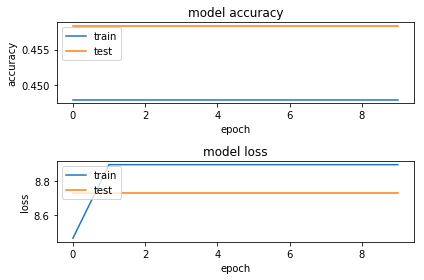

In [49]:
plt.figure()
plt.subplot(211)

#summarize accuracy history
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')

#summarize loss history
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')


plt.tight_layout()
plt.show()

In [50]:
score = model1.evaluate(x_test,y_test[0:24, :])

24/24 [==============================] - 7s 303ms/step


In [53]:
display(score[0])
display(score[1])

4.701111316680908

0.7083333134651184

## Evaluation
This network "turned out" the best, although the network itself really didn't do that well; I just got lucky. I went from getting about 39% pretty consistently to suddently getting 70%! I was so amazed that I double checked myself and ran the "evaluate" function again at the end just to prove it. That said, I later ran the exact same network with the only difference being a smaller validation_split and I added 10 to x_test and y_test. The output of that was 41%... so back to the mean. This was more or less what I expected, however.

The big difference between nets 3 and 4, and nets 1 and 2 were preprocessing, with lots of help from Kevin, and actually doing the accuracy testing at the end properly.